In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


Bad key text.latex.preview in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig

In [2]:
dfchicago = pd.read_csv('../data/chicago.csv', index_col=0)
dfboston = pd.read_csv('../data/boston.csv', index_col=0)
dfdc = pd.read_csv('../data/dc.csv', index_col=0)
dfphilly = pd.read_csv('../data/philly.csv', index_col=0)
dfcolumbus = pd.read_csv('../data/columbus.csv', index_col=0)
dfpittsburgh = pd.read_csv('../data/pittsburgh.csv', index_col=0)
dfportland = pd.read_csv('../data/portland.csv', index_col=0)
dfnyc = pd.read_csv('../data/nyc.csv', index_col=0)

dfchicago_prev = pd.read_csv('../data/chicago_prev.csv', index_col=0)
dfboston_prev = pd.read_csv('../data/boston_prev.csv', index_col=0)
dfdc_prev = pd.read_csv('../data/dc_prev.csv', index_col=0) 
dfnyc_prev = pd.read_csv('../data/nyc_prev.csv', index_col=0)

/software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dfdc = dfdc.rename(columns={'Duration': 'tripduration'})
dfphilly = dfphilly.rename(columns={'duration':'tripduration'})
dfpittsburgh = dfpittsburgh.rename(columns={'Tripduration':'tripduration'})
dfportland = dfportland.rename(columns={'Duration':'tripduration'})
dfdc_prev = dfdc_prev.rename(columns={'Duration': 'tripduration'})

In [4]:
dfcities = [dfchicago, dfboston, dfdc, dfphilly, dfcolumbus, dfpittsburgh, dfportland, dfnyc, dfchicago_prev, dfboston_prev, dfdc_prev, dfnyc_prev]
city_names = ['Chicago', 'Boston', 'Washington DC', 'Philadelphia', 'Columbus', 'Pittsburgh', 'Portland', 'New York City', 'Chicago Previous', 'Boston Previous', 'Washington DC Previous', 'New York City Previous']

In [27]:
def get_int(x):
    if type(x)==str:
        if ':' in x:
            h,m,s = x.split(':')
            return int(h)*3600 + int(m)*60 + int(s)
        else:
            return float(x.replace(',', ''))
    else:
        return x

In [28]:
for df in dfcities:
    df['tripduration'] = df['tripduration'].apply(lambda x: get_int(x))

In [4]:
plt.rcParams.update({'font.size': 14})

In [5]:
def plot_rates(df, city):
    casual_rates = df.groupby('month')['casual'].mean()
    plt.figure()
    casual_rates.plot(figsize=(10, 4), xlabel='Month', ylabel='Casual Trip Rate', \
                          title = f'Monthly Casual Trip Rate 2018-2019 ({city})')
    plt.show()

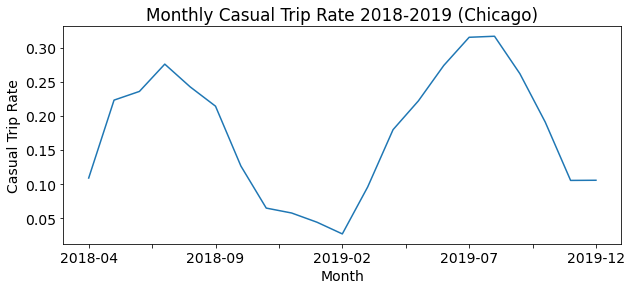

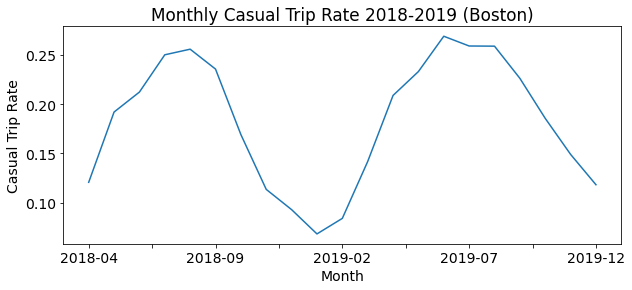

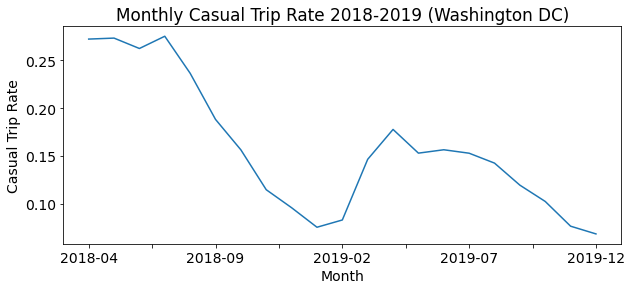

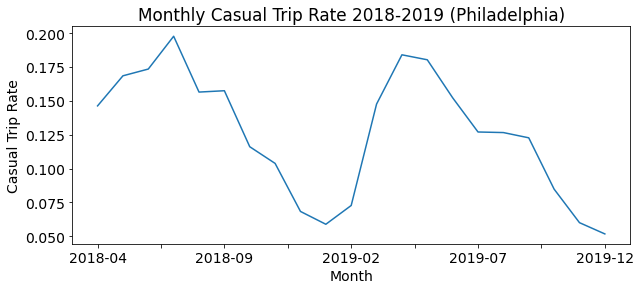

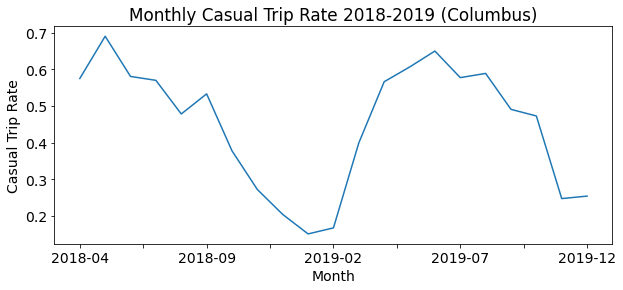

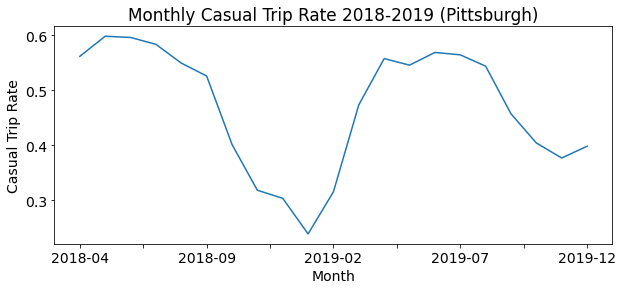

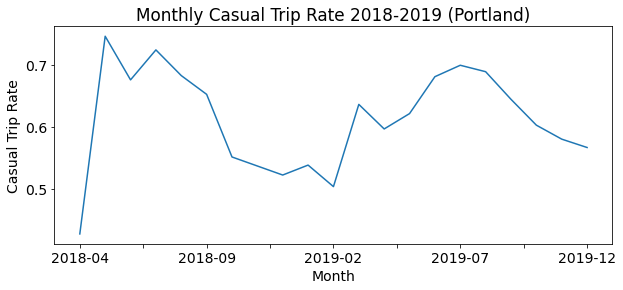

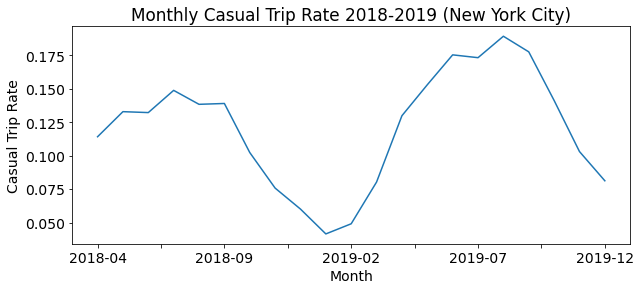

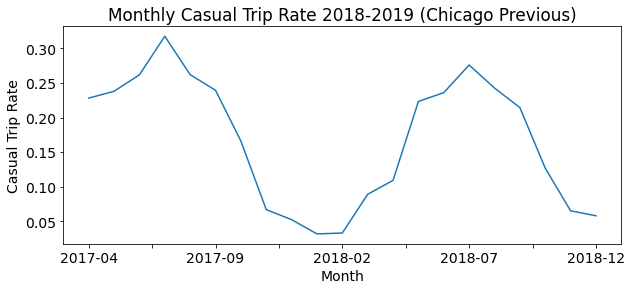

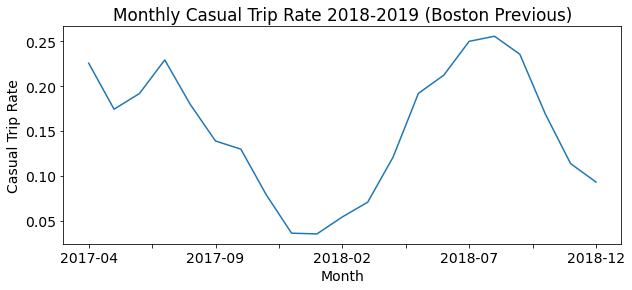

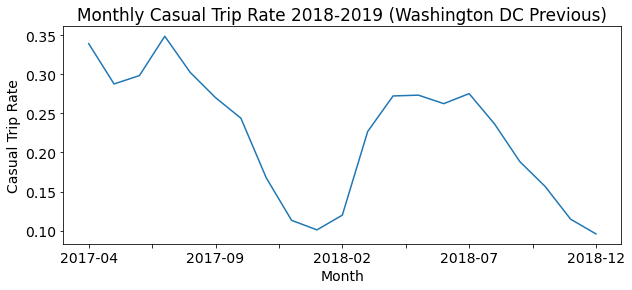

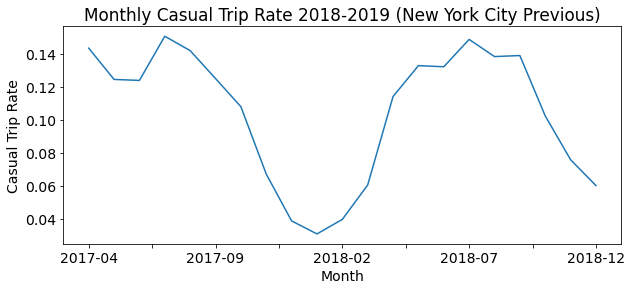

In [6]:
for i in range(len(dfcities)):
    plot_rates(dfcities[i], city_names[i])

In [7]:
def plot_trips(df, city):
    trip_counts = df['month'].value_counts().sort_index()
    plt.figure()
    trip_counts.plot(figsize=(10, 4), xlabel='Month', ylabel='Total Trips', \
                          title = f'Monthly Total Trip Counts 2018-2019 ({city})')
    plt.show()

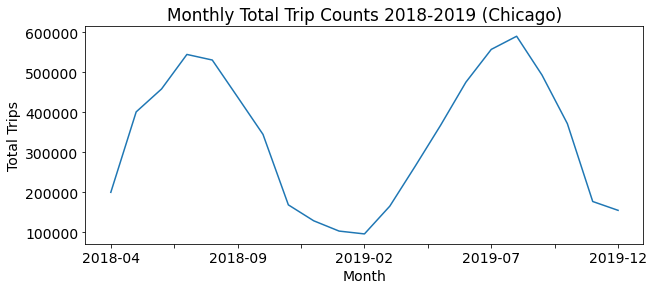

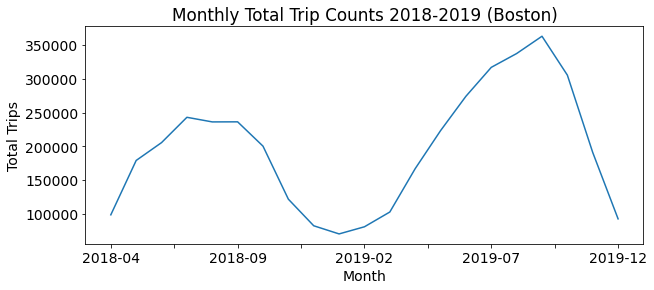

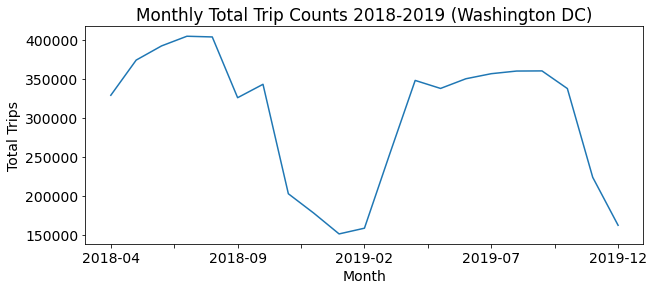

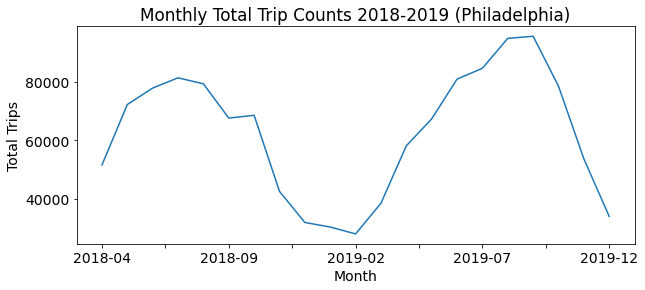

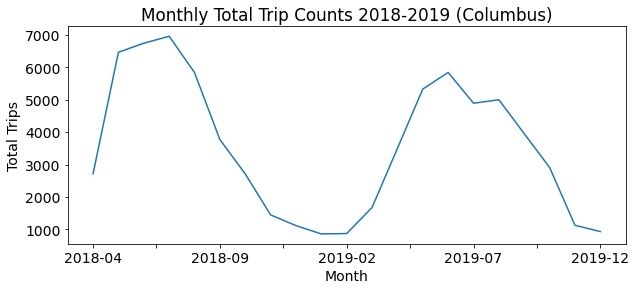

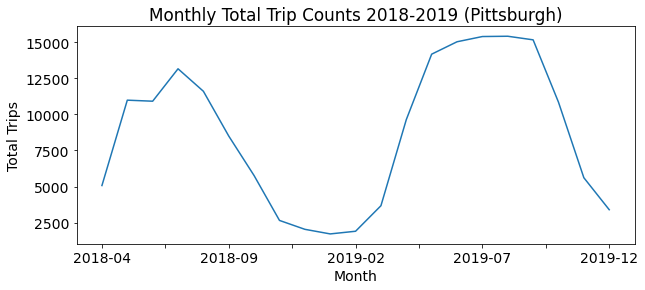

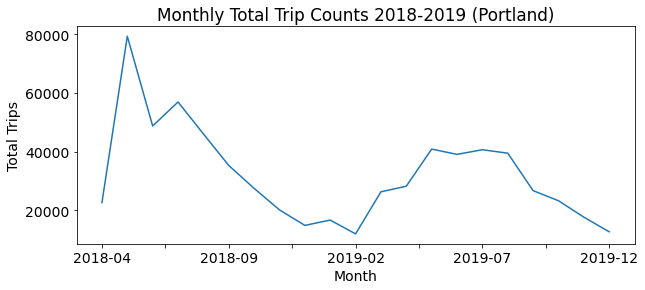

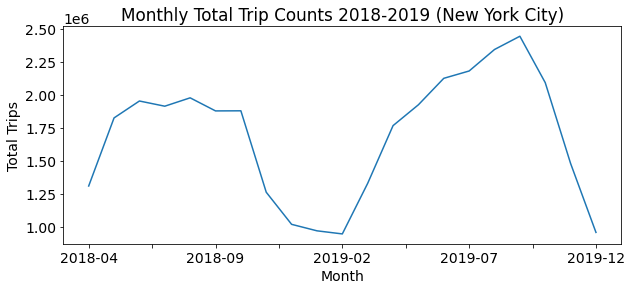

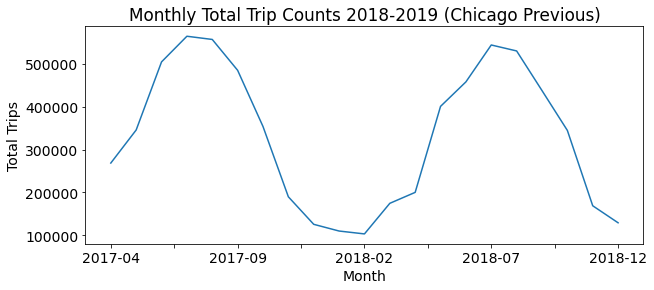

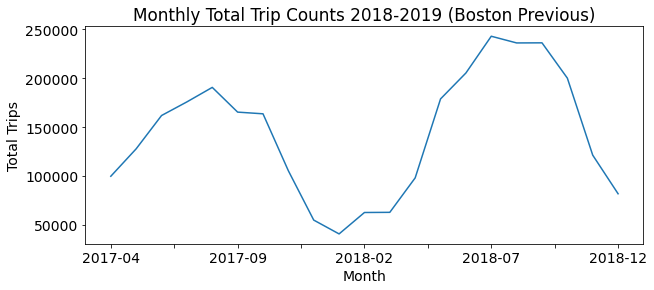

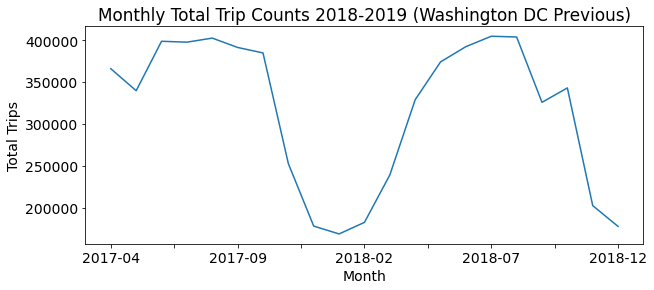

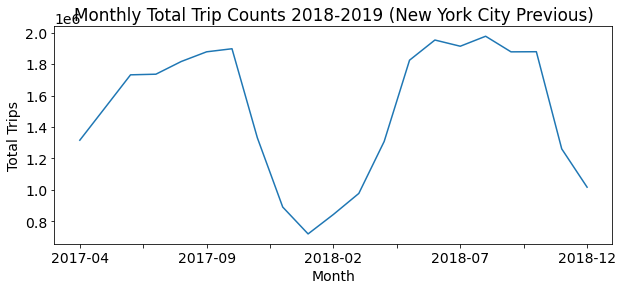

In [8]:
for i in range(len(dfcities)):
    plot_trips(dfcities[i], city_names[i])

# generating synthetic control tables

### casual trip rates

In [9]:
df_final = pd.DataFrame(dfcities[0].groupby('month')['casual'].mean()).reset_index()
df_final.columns = ['month', 'casual_rates']
df_final['city'] = city_names[0]

In [10]:
for i in range(1, len(dfcities)):
    df = pd.DataFrame(dfcities[i].groupby('month')['casual'].mean()).reset_index()
    df.columns = ['month', 'casual_rates']
    df['city'] = city_names[i]
    df_final = pd.concat([df_final, df])

In [13]:
df_final.to_csv('../outputs/casual_final.csv')

### total trips

In [6]:
df_final = pd.DataFrame(dfcities[0]['month'].value_counts().sort_index()).reset_index()
df_final.columns = ['month', 'total_trips']
df_final['city'] = city_names[0]

In [8]:
for i in range(1, len(dfcities)):
    df = pd.DataFrame(dfcities[i]['month'].value_counts().sort_index()).reset_index()
    df.columns = ['month', 'total_trips']
    df['city'] = city_names[i]
    df_final = pd.concat([df_final, df])

In [10]:
df_final.to_csv('../outputs/total_trips_final.csv')

### average trip durations

In [29]:
df_final = pd.DataFrame(dfcities[0].groupby('month')['tripduration'].mean()).reset_index()
df_final.columns = ['month', 'average_trip_duration']
df_final['city'] = city_names[0]

In [31]:
for i in range(1, len(dfcities)):
    df = pd.DataFrame(dfcities[i].groupby('month')['tripduration'].mean()).reset_index()
    df.columns = ['month', 'average_trip_duration']
    df['city'] = city_names[i]
    df_final = pd.concat([df_final, df])

In [33]:
df_final['average_trip_duration'] = df_final['average_trip_duration'].apply(lambda x: round(x, 2))

In [35]:
df_final.to_csv('../outputs/average_trip_duration_final.csv')